# 07/16
## Scaling
### Standard Scaling/Standardization (Z-Score)

In [60]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [29]:
wines = pd.read_csv('Wine_data.csv')

In [30]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


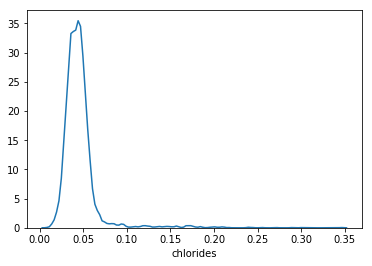

In [62]:
sns.distplot(wines['chlorides'],hist=False)
plt.show()

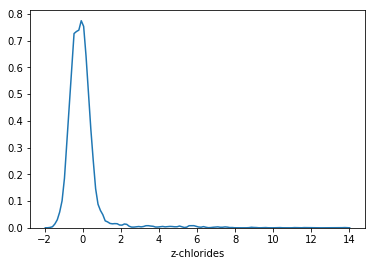

In [63]:
# Z-Scores
mean = wines['chlorides'].mean()
std = wines['chlorides'].std()
wines['z-chlorides'] = (wines['chlorides'] - mean)/std

sns.distplot(wines['z-chlorides'],hist=False)
plt.show()

In [65]:
DataFrame({'Skew':[wines['chlorides'].skew(),wines['z-chlorides'].skew()],
           'Kurtosis':[wines['chlorides'].kurt(),wines['z-chlorides'].kurt()]},
           index=['Chlorides','Z-Scores'])

,Skew,Kurtosis
Chlorides,5.023331,37.5646
Z-Scores,5.023331,37.5646


### Min-Max Scaling

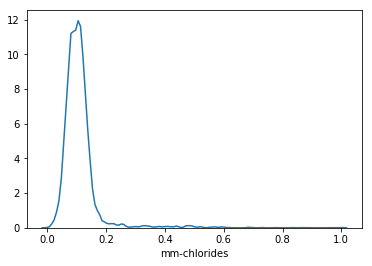

In [66]:
minc = wines['chlorides'].min()
maxc = wines['chlorides'].max()
wines['mm-chlorides'] = (wines['chlorides'] - minc)/(maxc-minc)

sns.distplot(wines['mm-chlorides'],hist=False)
plt.show()

In [68]:
DataFrame({'Skew':[wines['chlorides'].skew(),wines['z-chlorides'].skew(),wines['mm-chlorides'].skew()],
           'Kurtosis':[wines['chlorides'].kurt(),wines['z-chlorides'].kurt(),wines['mm-chlorides'].kurt()]},
           index=['Chlorides','Z-Scores','Min-Max'])

,Skew,Kurtosis
Chlorides,5.023331,37.5646
Z-Scores,5.023331,37.5646
Min-Max,5.023331,37.5646


## Transformation

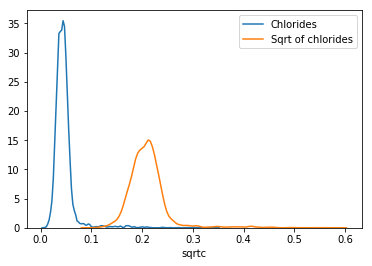

In [71]:
wines['sqrtc'] = np.sqrt(wines['chlorides'])

sns.distplot(wines['chlorides'],hist=False,label='Chlorides')
sns.distplot(wines['sqrtc'],hist=False,label='Sqrt of chlorides')
plt.show()

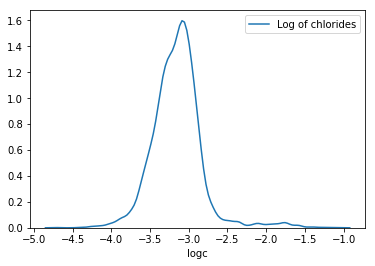

In [58]:
wines['logc'] = np.log(wines['chlorides'])
sns.distplot(wines['logc'],hist=False,label='Log of chlorides')
plt.show()

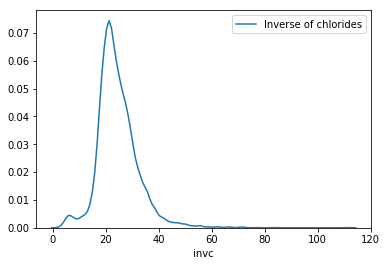

In [76]:
wines['invc'] = 1/(wines['chlorides'])
sns.distplot(wines['invc'],hist=False,label='Inverse of chlorides')
plt.show()

In [78]:
DataFrame({'Skew':[wines['chlorides'].skew(),wines['sqrtc'].skew(),wines['logc'].skew(),wines['invc'].skew()],
           'Kurtosis':[wines['chlorides'].kurt(),wines['sqrtc'].kurt(),wines['logc'].kurt(),wines['invc'].kurt()]},
           index=['Chlorides','Sqrt(Chlorides)','Log(Chlorides)','Inv(Chlorides)'])

,Skew,Kurtosis
Chlorides,5.023331,37.564600
Sqrt(Chlorides),2.850806,15.057037
Log(Chlorides),1.134134,5.300009
Inv(Chlorides),1.447322,7.748865


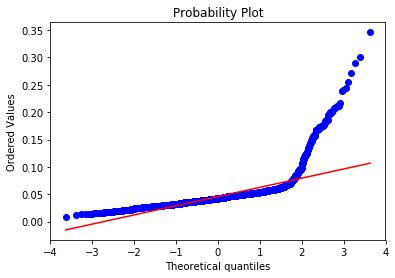

In [80]:
stats.probplot(wines['chlorides'], plot=plt)
plt.show()

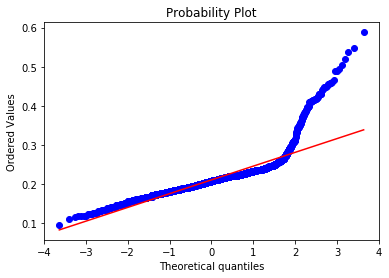

In [81]:
stats.probplot(wines['sqrtc'], plot=plt)
plt.show()

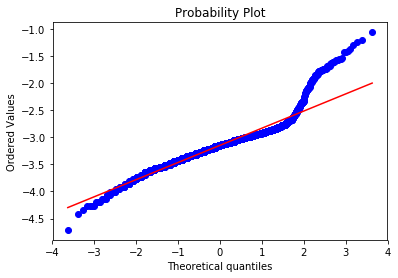

In [82]:
stats.probplot(wines['logc'], plot=plt)
plt.show()

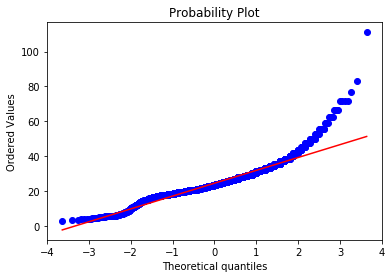

In [83]:
stats.probplot(wines['invc'], plot=plt)
plt.show()